# Reading Data

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
X = df.drop("Outcome", axis = 1)
Y = df["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [7]:
#PyTorch

import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
x_train = torch.FloatTensor(x_train.values)
x_test = torch.FloatTensor(x_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [9]:
df.shape

(768, 9)

# Creating PyTorch Model

In [10]:
class nn_model(nn.Module): # inheriting nn.Module class
    def __init__(self, in_features = 8, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
#         self.fc3 = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

In [11]:
#instantiate_model
torch.manual_seed(20)
model = nn_model()

In [12]:
model.parameters

<bound method Module.parameters of nn_model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [13]:
#Back_Prop: Define Loss & Optimizer
loss_fun = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.01)

# Training model

In [14]:
epochs = 1000
final_losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(x_train)
    loss = loss_fun(y_pred, y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print("Epoch No.: {} -> Loss: {}".format(i, loss.item()))
    optim.zero_grad() # clears all gradients of all the optimized classes
    loss.backward()
    optim.step()

Epoch No.: 1 -> Loss: 3.5123770236968994
Epoch No.: 11 -> Loss: 0.7999175190925598
Epoch No.: 21 -> Loss: 0.6057502627372742
Epoch No.: 31 -> Loss: 0.5955275297164917
Epoch No.: 41 -> Loss: 0.5744473338127136
Epoch No.: 51 -> Loss: 0.5646213889122009
Epoch No.: 61 -> Loss: 0.5565356016159058
Epoch No.: 71 -> Loss: 0.5483497381210327
Epoch No.: 81 -> Loss: 0.5413058400154114
Epoch No.: 91 -> Loss: 0.53444904088974
Epoch No.: 101 -> Loss: 0.5280916690826416
Epoch No.: 111 -> Loss: 0.5221874713897705
Epoch No.: 121 -> Loss: 0.5162979364395142
Epoch No.: 131 -> Loss: 0.5098689198493958
Epoch No.: 141 -> Loss: 0.5033777952194214
Epoch No.: 151 -> Loss: 0.49682673811912537
Epoch No.: 161 -> Loss: 0.4909767210483551
Epoch No.: 171 -> Loss: 0.4826871156692505
Epoch No.: 181 -> Loss: 0.47500577569007874
Epoch No.: 191 -> Loss: 0.46742329001426697
Epoch No.: 201 -> Loss: 0.4619620442390442
Epoch No.: 211 -> Loss: 0.46700796484947205
Epoch No.: 221 -> Loss: 0.45409682393074036
Epoch No.: 231 -> L

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

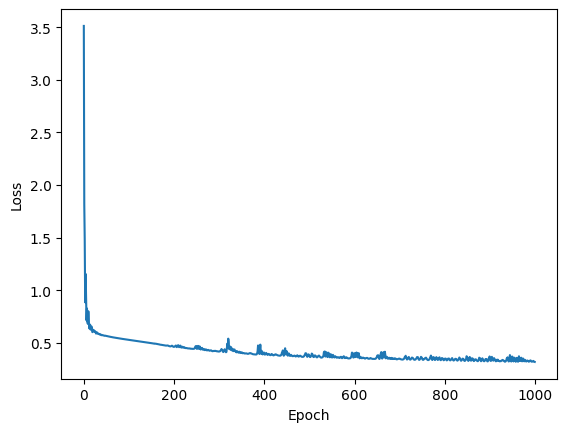

In [16]:
#plotting Loss Function

fin_loss = [fl.item() for fl in final_losses]

plt.plot(range(epochs),fin_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Prediction on Test Data

In [17]:
predictions = []

with torch.no_grad(): # To not print gradients of backprop [only neede while training]
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item()) # To get 0/1 instead of set of 2 values
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
1


## Calculating Accuracy of Model on Test Data

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[65, 13],
       [13, 25]])

Text(33.22222222222222, 0.5, 'Predicted Values')

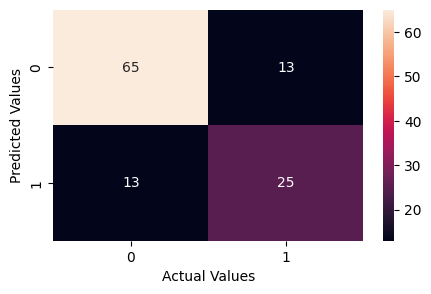

In [19]:
#Heatmap for confusion matrix

plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [20]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7758620689655172

In [21]:
import sklearn

In [22]:
f1_score = sklearn.metrics.f1_score(y_test,predictions)
f1_score

0.6578947368421053